## Performing a simple linear regression
Simple linear regression is a statistical method used to model the relationship between two continuous variables: one independent variable (predictor) and one dependent variable. It is widely used for understanding and predicting how changes in the independent variable relate to changes in the dependent variable. 

In this project, we use the house price data (House_Price.csv) to check how the number of rooms affect the price of the house.

### Using statsmodels
Performing linear regression to check whether the number of rooms can affect the price of a house

In [1]:
# Import the packages
import pandas as pd
import statsmodels.api as sm

In [2]:
# Read the data
df = pd.read_csv('House_Price.csv')

In [3]:
# Check the data
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [4]:
# Create a constant
X = sm.add_constant(df['room_num'])

In [5]:
# Create a model that uses Ordinary Least Squares (OLS) method
model = sm.OLS(df['price'], X).fit()

In [6]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           1.31e-74
Time:                        04:33:28   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Results
1. Intercept = -34.6592
2. Coefficient = 9.0997 ---> If you increase the room_num by one unit, the price increases by 9.0997 units
3. P-value (P>|t|) =~ 0.001 ---> The p value is very small showing that there is an association between the predictor(room_num) and the response(price) with a confidence of 99.9%.

### Using Sklearn

In [7]:
# Import the module
from sklearn.linear_model import LinearRegression

In [8]:
# Create the variables
y = df['price']
x = df[['room_num']]

In [9]:
model2 = LinearRegression()

In [10]:
# Perform the linear regression
model2.fit(x,y)

LinearRegression()

In [11]:
# Show the intercept and the coefficient
print(model2.intercept_, model2.coef_)

-34.6592431230972 [9.09966966]


In [12]:
model2.predict(x)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

In [13]:
# Plot the regression line using the seaborn library

# Import the library
import seaborn as sns

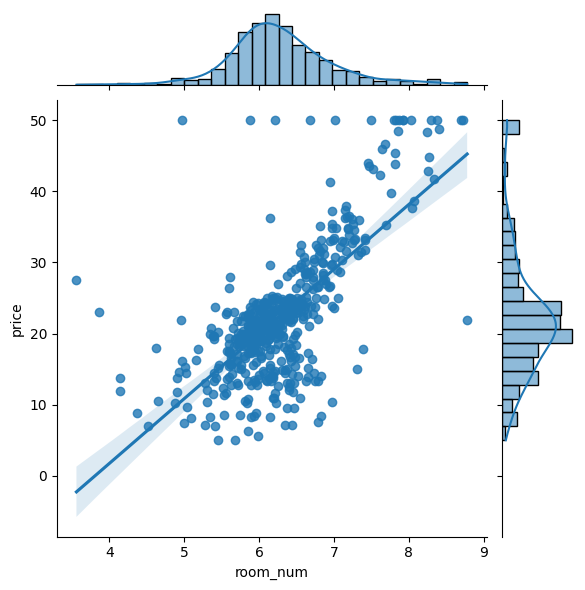

In [14]:
sns.jointplot(data = df, x = df['room_num'], y = df['price'], kind ='reg')